<a href="https://colab.research.google.com/github/Anki2912/Predicting-the-effectiveness-of-bank-marketing-campaigns/blob/main/Predicting_the_effectiveness_of_bank_marketing_campaigns_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 #file path reading or csv upload to colab from drive (seperated = ;)
data = pd.read_csv("/content/drive/MyDrive/Predicting the effectiveness of bank marketing campaigns/bank-full.csv",sep = ";")

**Dataset Overview**

In [ ]:
#view head of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Name of columns that we have in our data base 
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# **Descriptive Analysis**


Generally, descriptive analyzes are the first manipulations performed in a quantitative study and their main objective is to summarize and explore the behavior of the data involved in the study. Using statistical techniques such as frequency distribution, measures of central tendency and measures of dispersion we can better understand the way in which the phenomena under study behave.

In [ ]:
# Describing data only for numerical features
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In our numerical columns following points can be inferred ⏰

**age**- varies from 18 to 95 with mean and median around 40

**balance**- has negative values which ranges upto 102127, which means lot of outliers

**duration** of call- ranges upto 4918s with min 0 sec i.e presence of outliers
previous number of contacts- varies from 0 to 275

In [ ]:
#Checking number of rows and columns in our dataset.
data.shape

(45211, 17)

In [ ]:
# data types defines like integer and object
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**Checking for null values**

In [ ]:
#Checking the total null values in each feature
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Explore catagorical features**

In [ ]:
# Describing data only for categorical features
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
# Describing data of features for its unique values
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


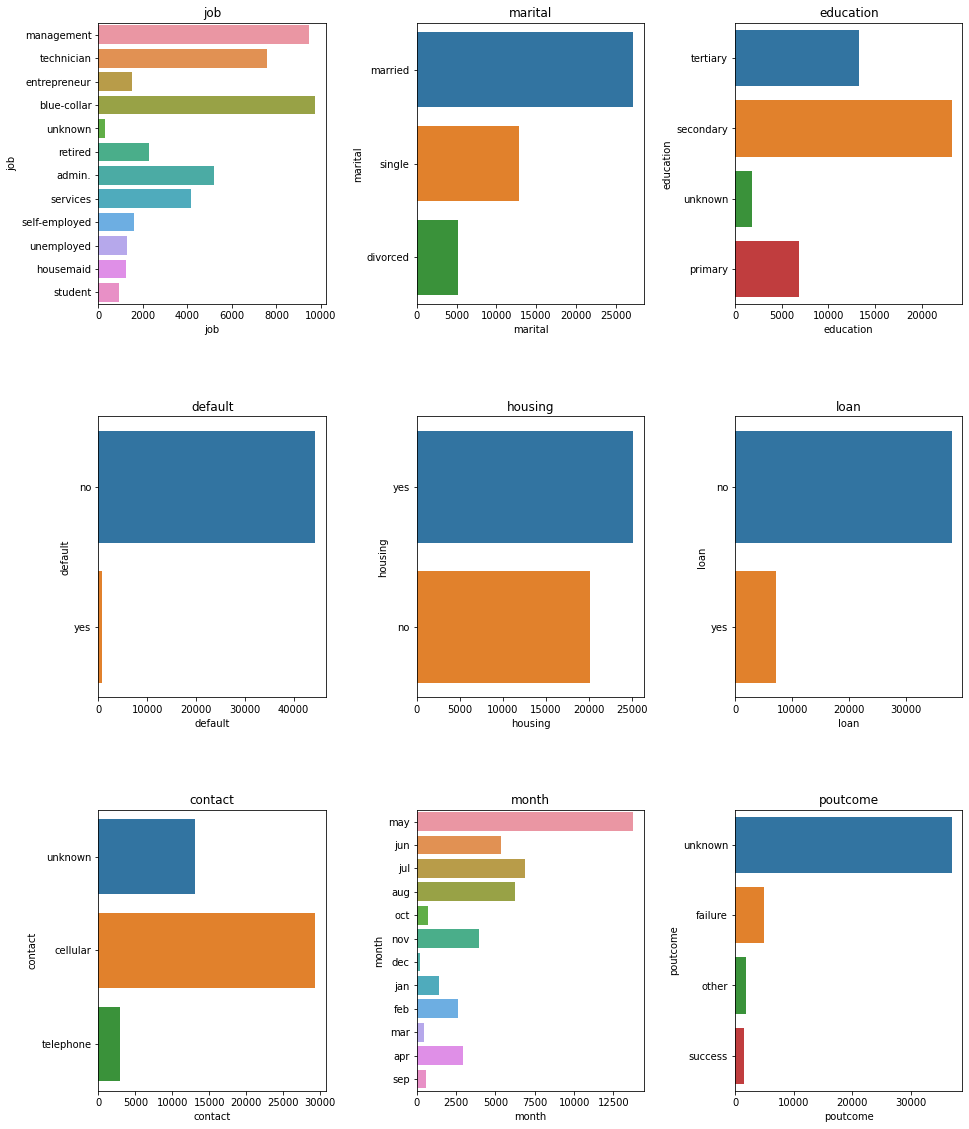

In [ ]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
   
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Client with job type as management records are high in given dataset and housemaid are very less.

Client who married are high in records in given dataset and divorced are less.

Client whoes education background is secondary are in high numbers in given dataset.

Defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop.

Data in month of may is high and less in dec.

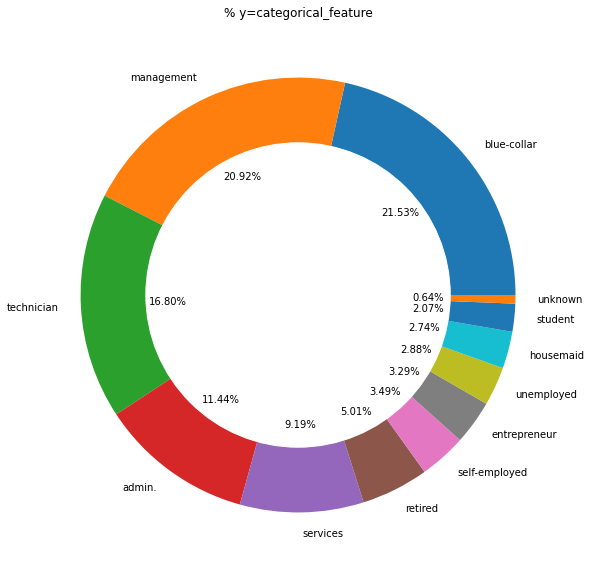

In [ ]:
 #Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(data.job.value_counts(),labels=data.job.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% y=categorical_feature')
plt.show()

In [ ]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(data.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

Retired client has high interest on deposit.

Client who has housing loan seems to be not interested much on deposit.

If pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit.

In month of March, September, October and December, client show high interest to deposit.

In month of may, records are high but client interst ratio is very less.

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  7


In [ ]:
data[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


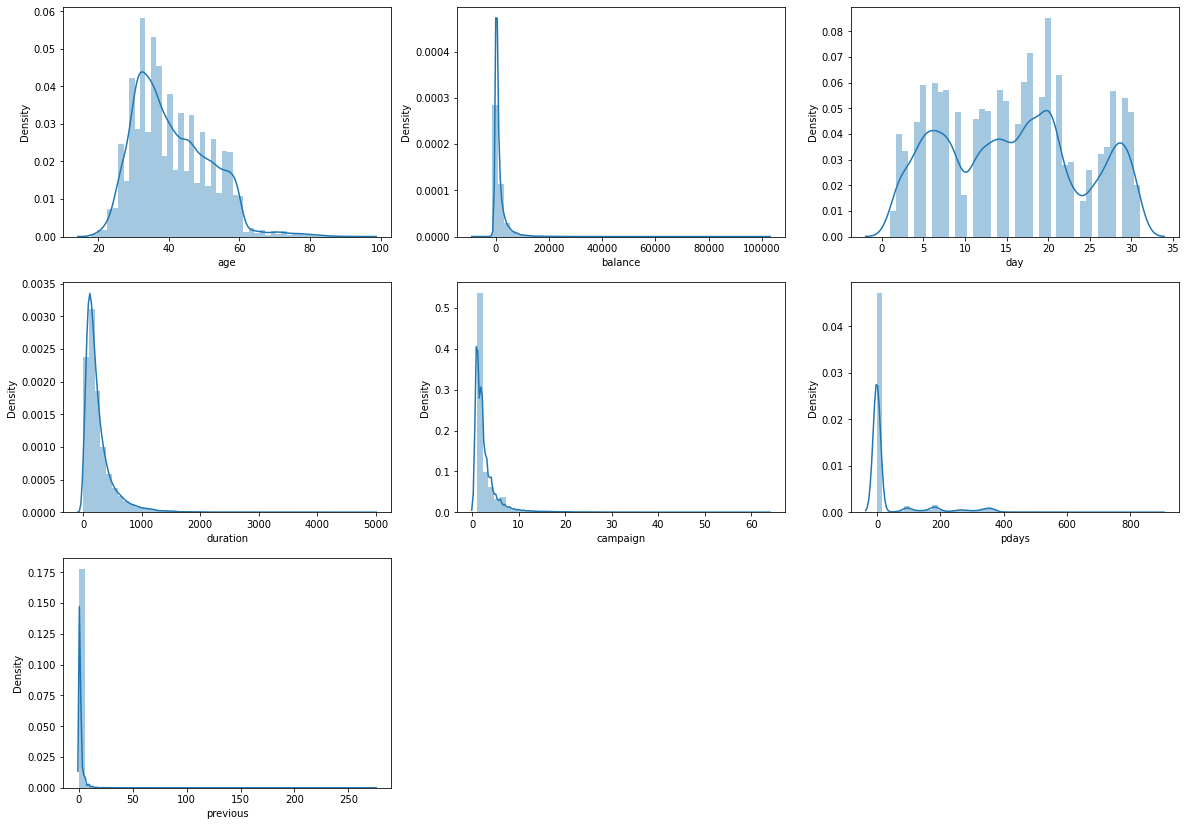

In [ ]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

It seems age, days distributed normally.

balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

**Finding outliers in numerical features**

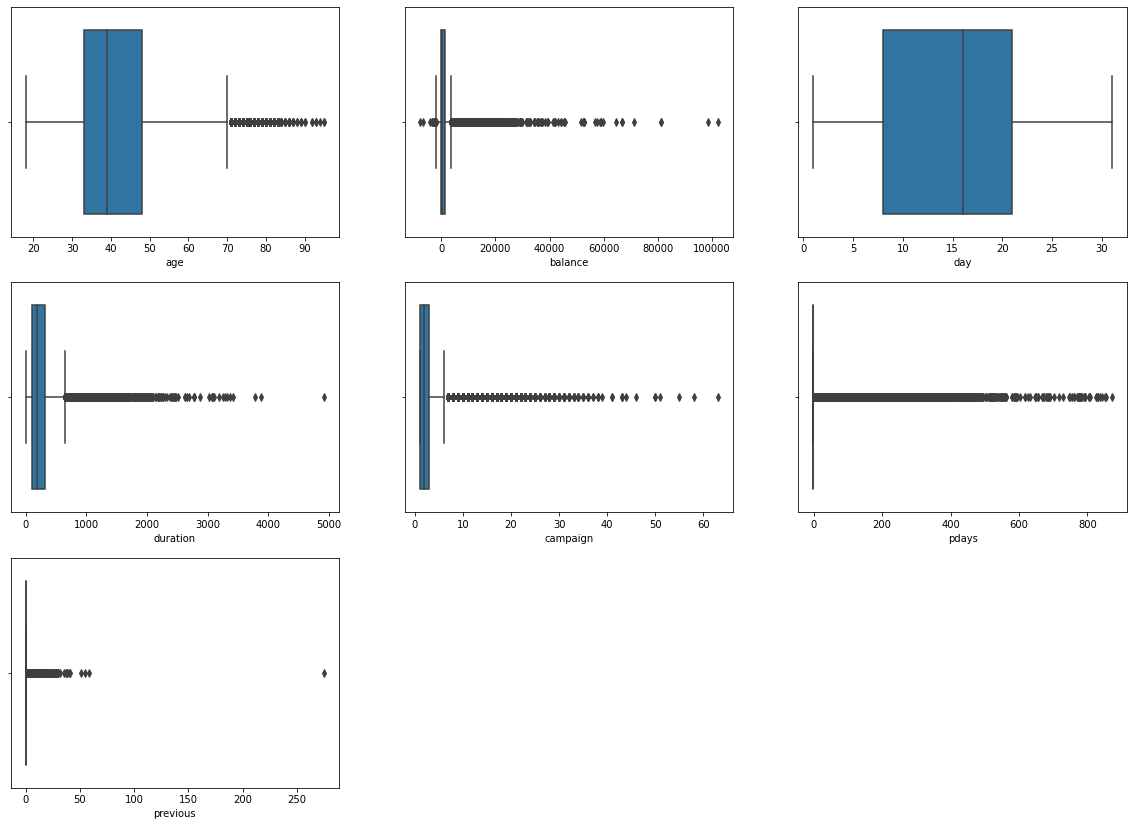

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**Explore correlation between numerical features**

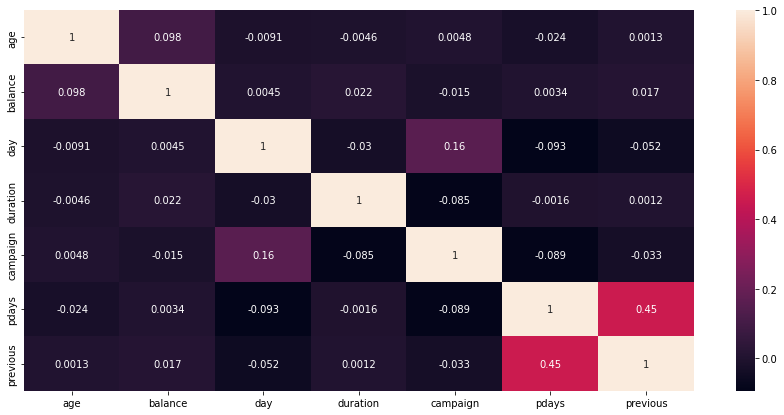

In [ ]:
## Checking for correlation
cor_mat=data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

 We can see that 'pdays' and 'previous' are highly corelated features, therefore, it will be good to remove any one of them to reduce multicollinearity.

#**Preprocessing**

In [ ]:
df = data.copy()

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.drop(['marital'],axis=1, inplace=True)
df.drop(['contact'],axis=1, inplace=True)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [ ]:
df[['default','housing','loan']]=df[['default','housing','loan']].replace(["yes","no"],["1","0"])
df['month']=df['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df['job']=df['job'].replace(['unknown'],['other'])

df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,no
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,no
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['education']=le.fit_transform(df['education'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [ ]:
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

In [ ]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


#**Handling outliers** 

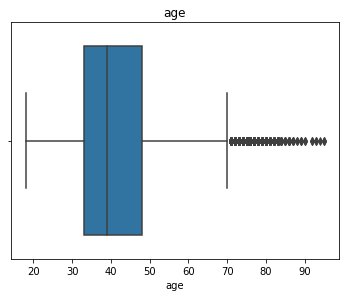

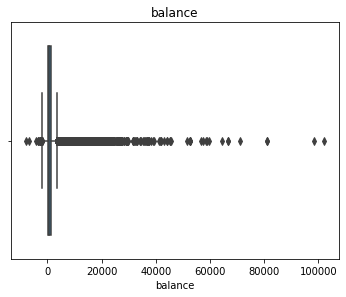

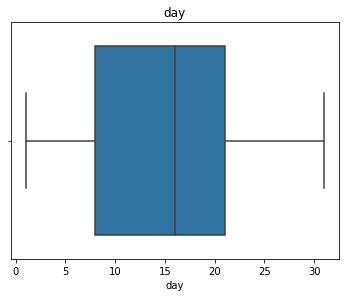

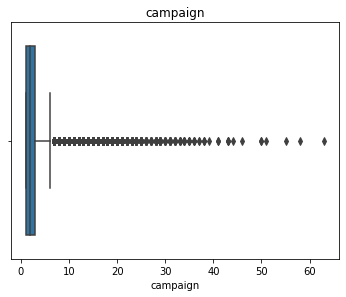

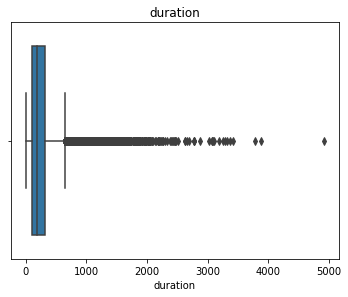

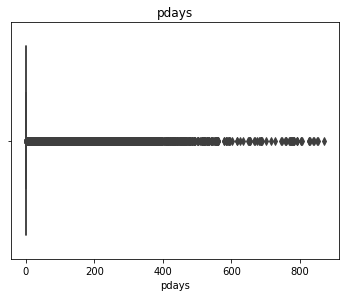

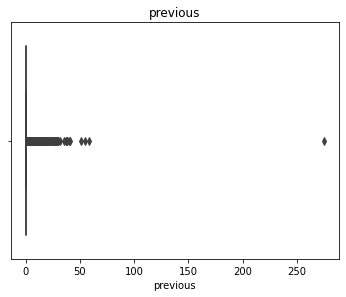

In [ ]:
col=df[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()
  n=n+1

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

[[1.60696496 0.25641925 0.0110161  0.56935064 0.41145311 0.25194037]
 [0.28852927 0.43789469 0.41612696 0.56935064 0.41145311 0.25194037]
 [0.74738448 0.44676247 0.70736086 0.56935064 0.41145311 0.25194037]
 ...
 [2.92540065 1.42959305 3.37379688 0.72181052 1.43618859 1.05047333]
 [1.51279098 0.22802402 0.97014641 0.39902023 0.41145311 0.25194037]
 [0.37068857 0.52836436 0.39932797 0.24656035 1.4761376  4.52357654]]


(40209, 15)

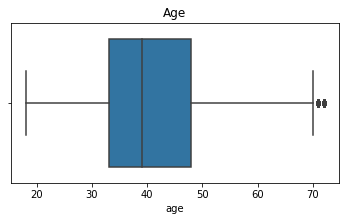

In [ ]:
#checking outliers removed or not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

In [ ]:
x=df.drop(['y'],axis=1) #contains all  independent variable
y=df['y']#dependent variable
df['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

Checking if the dataset is balanced or not.

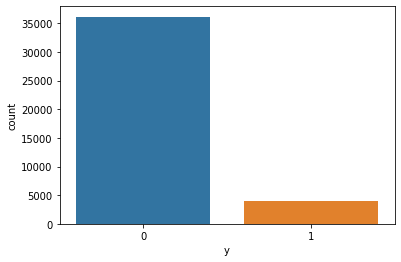

In [ ]:
sns.countplot(x='y',data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we will use resampling technique.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
x_new,y_new=os.fit_resample(x,y)

Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


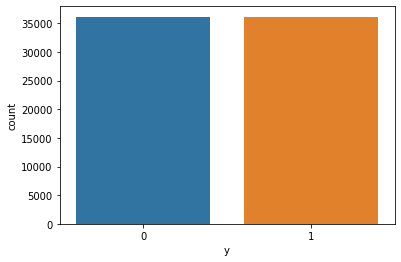

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(57848, 14) (14462, 14) (57848,) (14462,)


In [ ]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


##Logistic regression

ROC_AUC Score: 0.7953820222344823
[[5809 1338]
 [1627 5688]]


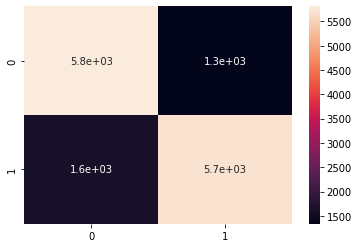

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)

print("ROC_AUC Score:",AUC_LR)

cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      7436
           1       0.78      0.81      0.79      7026

    accuracy                           0.79     14462
   macro avg       0.80      0.80      0.79     14462
weighted avg       0.80      0.79      0.80     14462



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.97294728 0.97052723 0.97035436 0.96672141 0.97009249]
0.9701285533949735


ROC_AUC Score: 0.9769679091781709
[[6795  352]
 [   1 7314]]


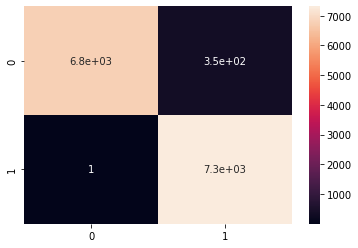

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6796
           1       1.00      0.95      0.98      7666

    accuracy                           0.98     14462
   macro avg       0.98      0.98      0.98     14462
weighted avg       0.98      0.98      0.98     14462



# **XGB Classifier**

ROC_AUC Score: 0.9769679091781709
[[5965 1182]
 [ 903 6412]]


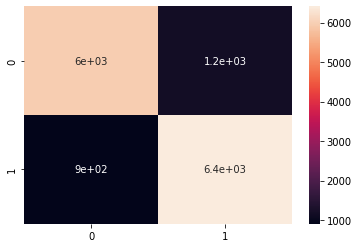

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

AUC_XGB=roc_auc_score(xgb_pred,y_test)
acc_xgb=accuracy_score(y_test,xgb_pred)
recall_xgb=recall_score(y_test,xgb_pred)
precision_xgb=precision_score(y_test,xgb_pred)
f1score_xgb=f1_score(y_test,xgb_pred)
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(y_test,xgb_pred)
print(cm)

sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6868
           1       0.88      0.84      0.86      7594

    accuracy                           0.86     14462
   macro avg       0.86      0.86      0.86     14462
weighted avg       0.86      0.86      0.86     14462



In [ ]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85237684 0.84848747 0.85445117 0.85106751 0.85366064]
0.852008724773601


In [ ]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [ ]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [ ]:
scores

[{'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 100},
  'best_score': 0.7959133478412529,
  'model': 'RandomForestClassifier'},
 {'best_params': {'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 200},
  'best_score': 0.9671898293452991,
  'model': 'XGBClassifier'}]

# **K-Nearest Neighbors**

ROC_AUC Score: 0.9335554864384804
[[6139   67]
 [1008 7248]]


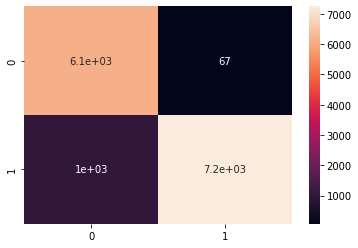

In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

acc_knn=accuracy_score(y_test,y_predict)
recall_knn=recall_score(y_test,y_predict)
precision_knn=precision_score(y_test,y_predict)
f1score_knn=f1_score(y_test,y_predict)

AUC_KN=roc_auc_score(y_predict,y_test)
print("ROC_AUC Score:",AUC_KN)
cm=confusion_matrix(y_predict,y_test)
print(cm)

sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6206
           1       0.99      0.88      0.93      8256

    accuracy                           0.93     14462
   macro avg       0.92      0.93      0.93     14462
weighted avg       0.93      0.93      0.93     14462



In [ ]:
ind=['Logistic regression','Randomforest','KNNeighbors','XGB Classifier']
data={"Accuracy":[acc_lr,acc_rf,acc_knn,acc_xgb],"Recall":[recall_lr,recall_rf,recall_knn,recall_xgb],"Precision":[precision_lr,precision_rf,precision_knn,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_knn,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_KN,AUC_XGB]}
result=pd.DataFrame(data=data,index=ind)
result.head()

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.794980,0.777580,0.809564,0.793250,0.795382
Randomforest,0.975591,0.999863,0.954083,0.976437,0.976968
KNNeighbors,0.925667,0.990841,0.877907,0.930961,0.933555
XGB Classifier,0.855829,0.876555,0.844351,0.860152,0.856436


After feature selection we started with model building by initially balancing the imbalanced data and then normalizing the data. This sums up for the classification task of bank marketing dataset. We find that Random Forest gives us the best value for accuracy which is 0.98 while KNNClassifier gives us the second best accuracy value. The best AUCscore of 0.97 comes from RandomForest followed by KNN classifier.
The results of RandomForest and KNNClassifier are better while rest of the algorithms are giving more or less same result with minor differences.
As per algorithms importance of whether client uses cellular phone or not and the month in which client is being called play a vital role and the strategies of marketing campaign should be decided accordingly.

